### Importing libraries

In [48]:
import pandas as pd
import seaborn as sns

In [49]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [50]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.00,"3,750.00",Male
1,Adelie,Torgersen,39.50,17.40,186.00,"3,800.00",Female
2,Adelie,Torgersen,40.30,18.00,195.00,"3,250.00",Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.70,19.30,193.00,"3,450.00",Female


In [51]:
df.columns.tolist()

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [52]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.00,342.00,342.00,342.00
mean,43.92,17.15,200.92,"4,201.75"
std,5.46,1.97,14.06,801.95
min,32.10,13.10,172.00,"2,700.00"
25%,39.23,15.60,190.00,"3,550.00"
50%,44.45,17.30,197.00,"4,050.00"
75%,48.50,18.70,213.00,"4,750.00"
max,59.60,21.50,231.00,"6,300.00"


In [53]:
df.dropna(inplace = True)
df.reset_index(drop = True,inplace = True)
X = df[['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']].copy()
y = df['species'].copy()


### Using Featuretools for Feature Engineering

In [54]:
!pip install featuretools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import featuretools as ft
#Setting the entity base
es = ft.EntitySet(id = 'penguin_model')
es.add_dataframe(dataframe_name = 'training', dataframe = x, make_index = True, index = 'index')

Entityset: penguin_model
  DataFrames:
    training [Rows: 275, Columns: 8]
  Relationships:
    No relationships

In [56]:
#Setting the ID based for feature engineering
es.normalize_dataframe(base_dataframe_name = 'training', new_dataframe_name = 'bill_length_mm', index = 'bill_length_mm')
es.normalize_dataframe(base_dataframe_name = 'training', new_dataframe_name = 'bill_depth_mm', index = 'bill_depth_mm')
es.normalize_dataframe(base_dataframe_name = 'training', new_dataframe_name = 'flipper_length_mm', index = 'flipper_length_mm')

Entityset: penguin_model
  DataFrames:
    training [Rows: 275, Columns: 8]
    bill_length_mm [Rows: 148, Columns: 1]
    bill_depth_mm [Rows: 78, Columns: 1]
    flipper_length_mm [Rows: 54, Columns: 1]
  Relationships:
    training.bill_length_mm -> bill_length_mm.bill_length_mm
    training.bill_depth_mm -> bill_depth_mm.bill_depth_mm
    training.flipper_length_mm -> flipper_length_mm.flipper_length_mm

In [57]:
#Deep Feature Synthetic
feature_matrix, feature_defs = ft.dfs(entityset = es, target_dataframe_name= 'training'
,agg_primitives= ['skew', 'count', 'mean', 'median','std',  'mode', 'max', 'min'],
trans_primitives = ['add_numeric', 'multiply_numeric'])
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 274
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   species                                         275 non-null    category
 1   island                                          275 non-null    category
 2   bill_length_mm                                  273 non-null    float64 
 3   bill_depth_mm                                   273 non-null    float64 
 4   flipper_length_mm                               273 non-null    float64 
 5   body_mass_g                                     273 non-null    float64 
 6   sex                                             265 non-null    category
 7   bill_length_mm.COUNT(training)                  275 non-null    Int64   
 8   bill_length_mm.MAX(training.body_mass_g)        273 non-null    float64 
 9   bill_length_mm.MEAN(training.bod

### Using Auto ViML

In [58]:
!pip install autoviml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
feature_matrix['species'] = y

==================== System Information ====================
System: Linux
Node Name: 20a13f514bde
Release: 5.10.133+
Version: #1 SMP Fri Aug 26 08:44:51 UTC 2022
Machine: x86_64
Processor: x86_64
====================== CPU Information ======================
Physical cores: 1
Total cores: 2
==================== Memory Information ====================
Total: 12.68GB
Available: 11.19GB
Used: 1.32GB
================== System Information End ==================
##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (275, 38)
    Training Set Memory Usage = 0.06 MB
Single_Label Target: ['species']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
       Class  -> Counts -> Percent
      Adelie:     146  ->   53.1%
   Chinstrap:      68  ->   24.7%
      Gentoo

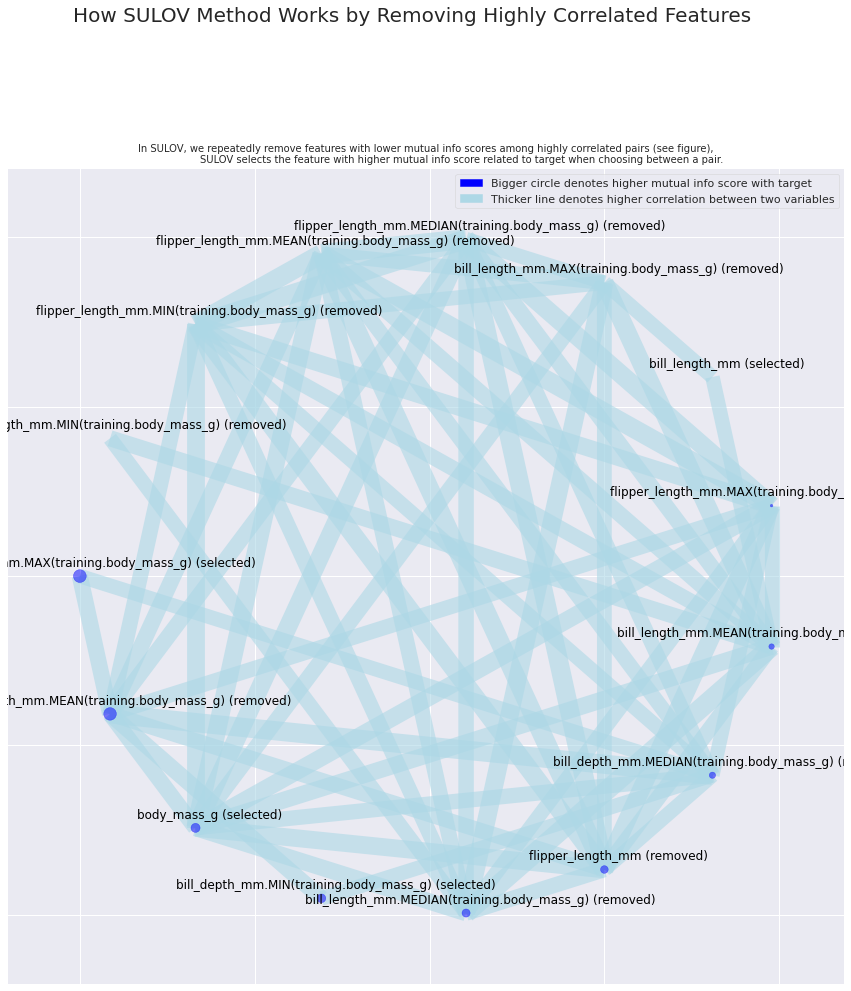

Splitting selected features into float and categorical (integer) variables:
    (11) float variables ...
    (47) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 58 
    Finding Important Features using Boosted Trees algorithm...
        using 58 variables...
        using 46 variables...
        using 34 variables...
        using 22 variables...
        using 10 variables...
Found 20 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  247 , CV rows =  28
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling 

Could not plot SHAP values since SHAP is not installed or could not import SHAP in this machine
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 51
Writing Output files to disk...
    Saving predictions to ./species/species_Multi_Classification_test_modified.csv
    Saving predictions to ./species/species_Multi_Classification_submission.csv
    Saving predictions to ./species/species_Multi_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 0.9 for the Entire Process


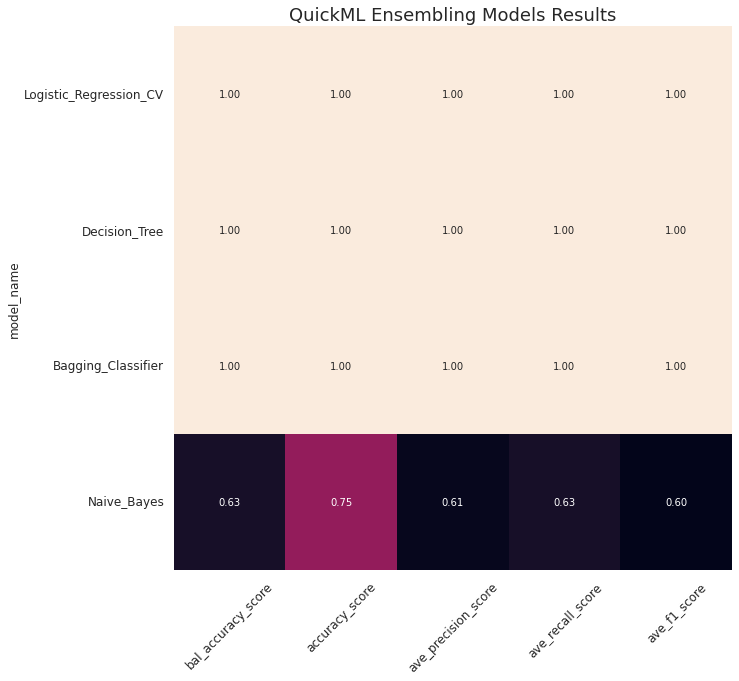

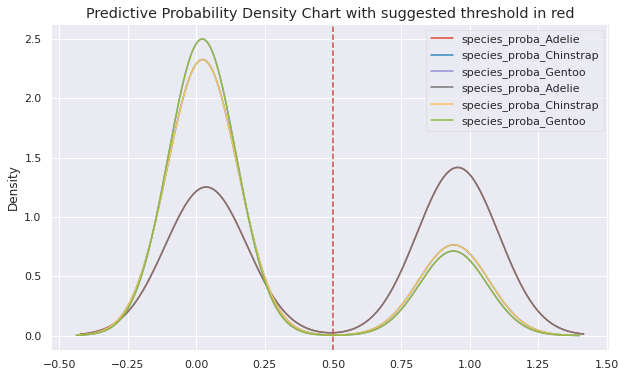

In [69]:
from autoviml.Auto_ViML import Auto_ViML

model, features, trainm, testm = Auto_ViML(train = feature_matrix, target = "species", test = "", sample_submission = "", hyper_param="RS",
                                          feature_reduction=True, scoring_parameter="RMSE", Boosting_Flag=True, verbose = 2)

In [70]:
features

['penguins',
 'body_mass_g',
 'bill_depth_mm.COUNT(training)',
 'bill_depth_mm.MAX(training.body_mass_g)',
 'bill_depth_mm',
 'flipper_length_mm.SKEW(training.body_mass_g)',
 'bill_depth_mm.SKEW(training.body_mass_g)',
 'bill_length_mm.SKEW(training.body_mass_g)',
 'bill_length_mm.STD(training.body_mass_g)',
 'flipper_length_mm.COUNT(training)',
 'flipper_length_mm.STD(training.body_mass_g)',
 'bill_depth_mm.STD(training.body_mass_g)',
 'bill_depth_mm.MIN(training.body_mass_g)',
 'bill_length_mm',
 'bill_length_mm.MODE(training.species)',
 'bill_length_mm.MODE(training.sex)',
 'bill_length_mm.STD(training.body_mass_g)_Missing_Flag',
 'bill_length_mm.SKEW(training.body_mass_g)_Missing_Flag',
 'flipper_length_mm.SKEW(training.body_mass_g)_Missing_Flag',
 'bill_depth_mm.SKEW(training.body_mass_g)_Missing_Flag']

In [71]:
model

CalibratedClassifierCV(base_estimator=OneVsRestClassifier(estimator=XGBClassifier(base_score=None,
                                                                                  booster='gbtree',
                                                                                  callbacks=None,
                                                                                  colsample_bylevel=None,
                                                                                  colsample_bynode=None,
                                                                                  colsample_bytree=None,
                                                                                  early_stopping_rounds=None,
                                                                                  enable_categorical=False,
                                                                                  eval_metric=None,
                                                                     

### Using Featurewiz 

In [72]:
!pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 31.5 MB/s 
     |████████████████████████████████| 26.7 MB 1.3 MB/s 
     |████████████████████████████████| 96 kB 6.6 MB/s 
     |████████████████████████████████| 72 kB 1.1 MB/s 
     |████████████████████████████████| 3.2 MB 55.1 MB/s 
     |████████████████████████████████| 2.0 MB 41.2 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 6.0.1
    Uninstalling pyarrow-6.0.1:
      Successfully uninstalled pyarrow-6.0.1
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgb

Imported 0.2.02 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.8
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (275, 38)
    Some

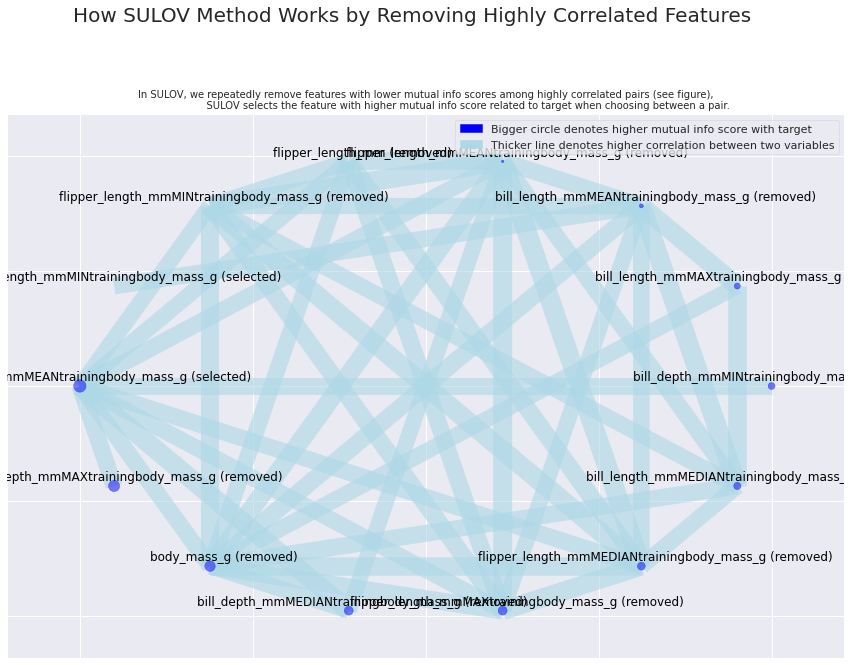

Time taken for SULOV method = 1 seconds
    Adding 12 categorical variables to reduced numeric variables  of 14
Final list of selected 26 vars after SULOV = ['bill_depth_mm', 'bill_depth_mmCOUNTtraining', 'bill_depth_mmSKEWtrainingbody_mass_g', 'bill_depth_mmSTDtrainingbody_mass_g', 'bill_length_mm', 'bill_length_mmCOUNTtraining', 'bill_length_mmSKEWtrainingbody_mass_g', 'bill_length_mmSTDtrainingbody_mass_g', 'flipper_length_mmCOUNTtraining', 'flipper_length_mmSKEWtrainingbody_mass_g', 'flipper_length_mmSTDtrainingbody_mass_g', 'bill_depth_mmMEANtrainingbody_mass_g', 'bill_length_mmMEDIANtrainingbody_mass_g', 'bill_length_mmMINtrainingbody_mass_g', 'bill_depth_mmMODEtrainingisland', 'bill_depth_mmMODEtrainingsex', 'bill_depth_mmMODEtrainingspecies', 'bill_length_mmMODEtrainingisland', 'bill_length_mmMODEtrainingsex', 'bill_length_mmMODEtrainingspecies', 'flipper_length_mmMODEtrainingisland', 'flipper_length_mmMODEtrainingsex', 'flipper_length_mmMODEtrainingspecies', 'island', 'penguin

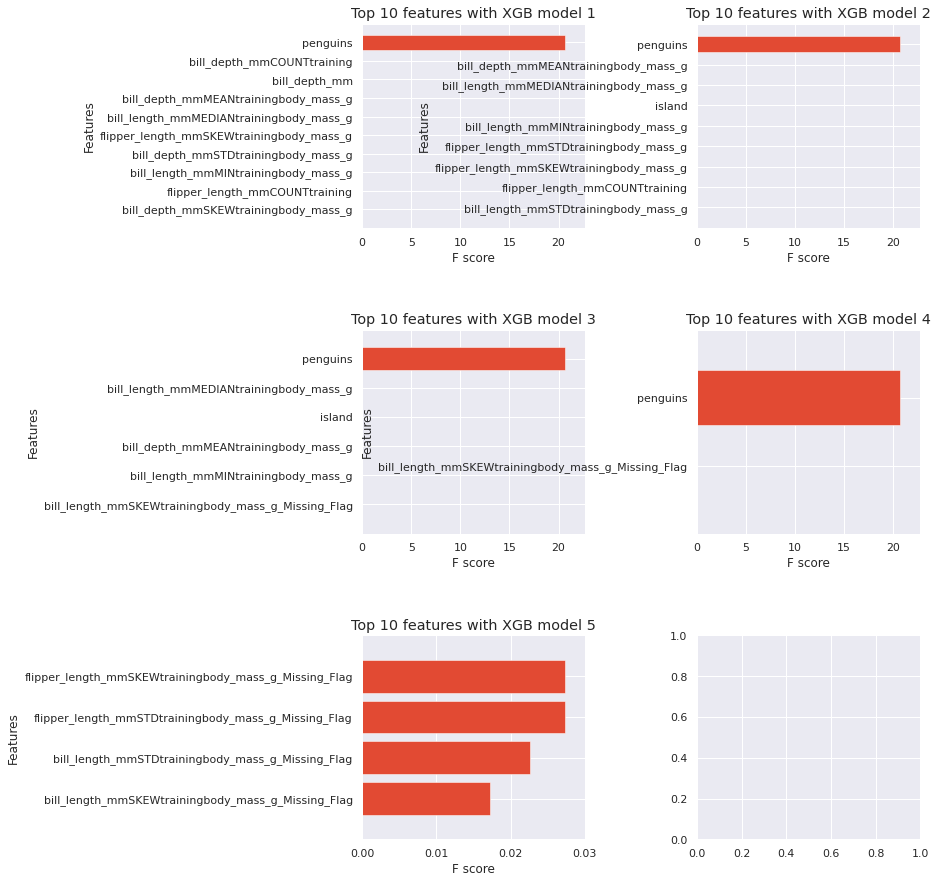

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 1 important features:
['penguins']
Total Time taken for featurewiz selection = 14 seconds
Output contains a list of 1 important features and a train dataframe


In [73]:
from featurewiz import featurewiz
features = featurewiz(
    dataname= feature_matrix,
    target = 'species',
    corr_limit=0.8,
    verbose=2)

In [74]:
features

(['penguins'],        penguins  species
 index                   
 0             0        0
 1             0        0
 2             0        0
 3             0        0
 4             0        0
 ...         ...      ...
 270           2        2
 271           2        2
 272           2        2
 273           2        2
 274           2        2
 
 [275 rows x 2 columns])